<a href="https://colab.research.google.com/github/dikshantshambharkar/TCS_stock_analytics/blob/main/Dikshant_Project_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AN ANALYTICAL STUDY ON STOCK OF TATA CONSULTANCY SERVICES LTD. AND ITS PREDICTION**

---



## **Contents**:
1.   Importing Data and Preparation 
2.   Visualizations
3.   Analysis of Stock
4.   Using ML models for prediction
5.   Forecasting the prices on chart



Importing important libraries

In [ ]:
# import libraries
import pandas as pd
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

try:
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc
except:
    !pip install mplfinance mpl_finance
    import mplfinance as mpf
    import mpl_finance as mplf
    from mpl_finance import candlestick_ohlc

Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tcs = pd.read_csv('/content/drive/MyDrive/TCS_Latest_stockdata_yahoo.csv')
print(tcs.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2002-08-12  38.724998  40.000000  38.724998  39.700001  28.484993  212976.0
1  2002-08-13  39.750000  40.387501  38.875000  39.162498  28.099329  153576.0
2  2002-08-14  39.250000  39.250000  35.724998  36.462502  26.162064  822776.0
3  2002-08-15  36.462502  36.462502  36.462502  36.462502  26.162064       0.0
4  2002-08-16  36.275002  38.000000  35.750000  36.375000  26.099281  811856.0


In [ ]:
tcs.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5138,2023-04-05,3185.500000,3264.350098,3185.500000,3239.800049,3239.800049,2655065.0
5139,2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3220.699951,1703464.0
5140,2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3263.399902,2203187.0
5141,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779.0
5142,2023-04-12,3227.949951,3260.949951,3199.000000,3241.649902,3241.649902,2417727.0


Total number of Rows and column

In [ ]:
tcs.shape


(5143, 7)

Missing values

In [ ]:
tcs.isnull().sum()

Date         0
Open         9
High         9
Low          9
Close        9
Adj Close    9
Volume       9
dtype: int64

Dropping the missing values

In [ ]:
tcs.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.484993,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.099329,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.162064,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.162064,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.099281,811856.0
...,...,...,...,...,...,...,...
5138,2023-04-05,3185.500000,3264.350098,3185.500000,3239.800049,3239.800049,2655065.0
5139,2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3220.699951,1703464.0
5140,2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3263.399902,2203187.0
5141,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779.0


In [ ]:
tcs.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
Open,5134.000000,1080.912037,1044.142759,32.474998,228.218750,653.500000,1433.293762,4033.949951
High,5134.000000,1092.363274,1053.444802,36.450001,233.768745,660.037506,1441.106262,4043.000000
Low,5134.000000,1068.526979,1033.776858,32.474998,222.312500,646.024994,1418.125000,3980.000000
Close,5134.000000,1080.325316,1043.544657,35.474998,227.459370,652.012512,1431.412537,4019.149902
Adj Close,5134.000000,976.026785,1020.026184,25.453529,168.513802,526.073150,1284.518067,3885.789307
Volume,5134.000000,3247111.494741,3186767.093843,0.000000,1663095.750000,2554532.000000,4024570.000000,88067154.000000


## Visualization

Candlestick Chart

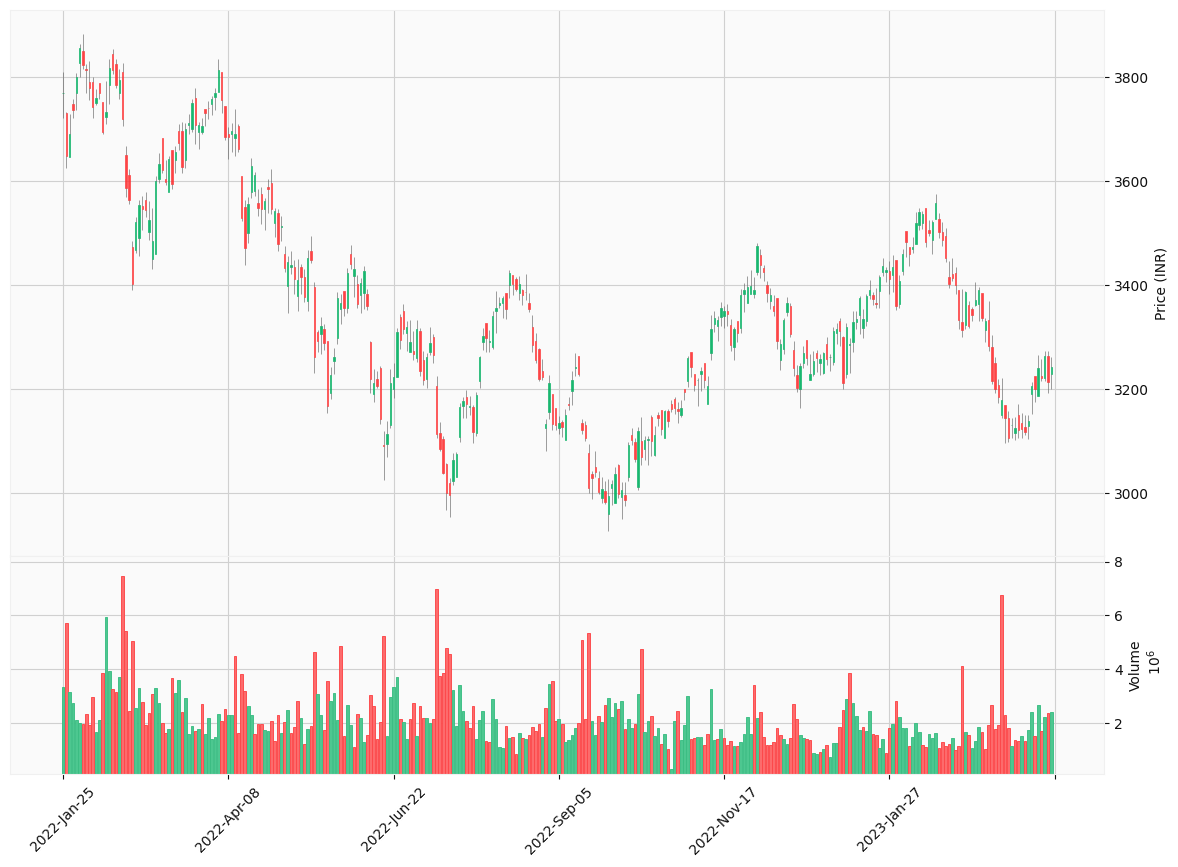

In [ ]:
tcs.index = pd.DatetimeIndex(tcs['Date'])
mpf.plot(tcs.tail(300), type='candle', style='yahoo',
        ylabel='Price (INR)',
        ylabel_lower='Volume',
        volume=True,
        figscale=1.9
        )

OHLC Chart

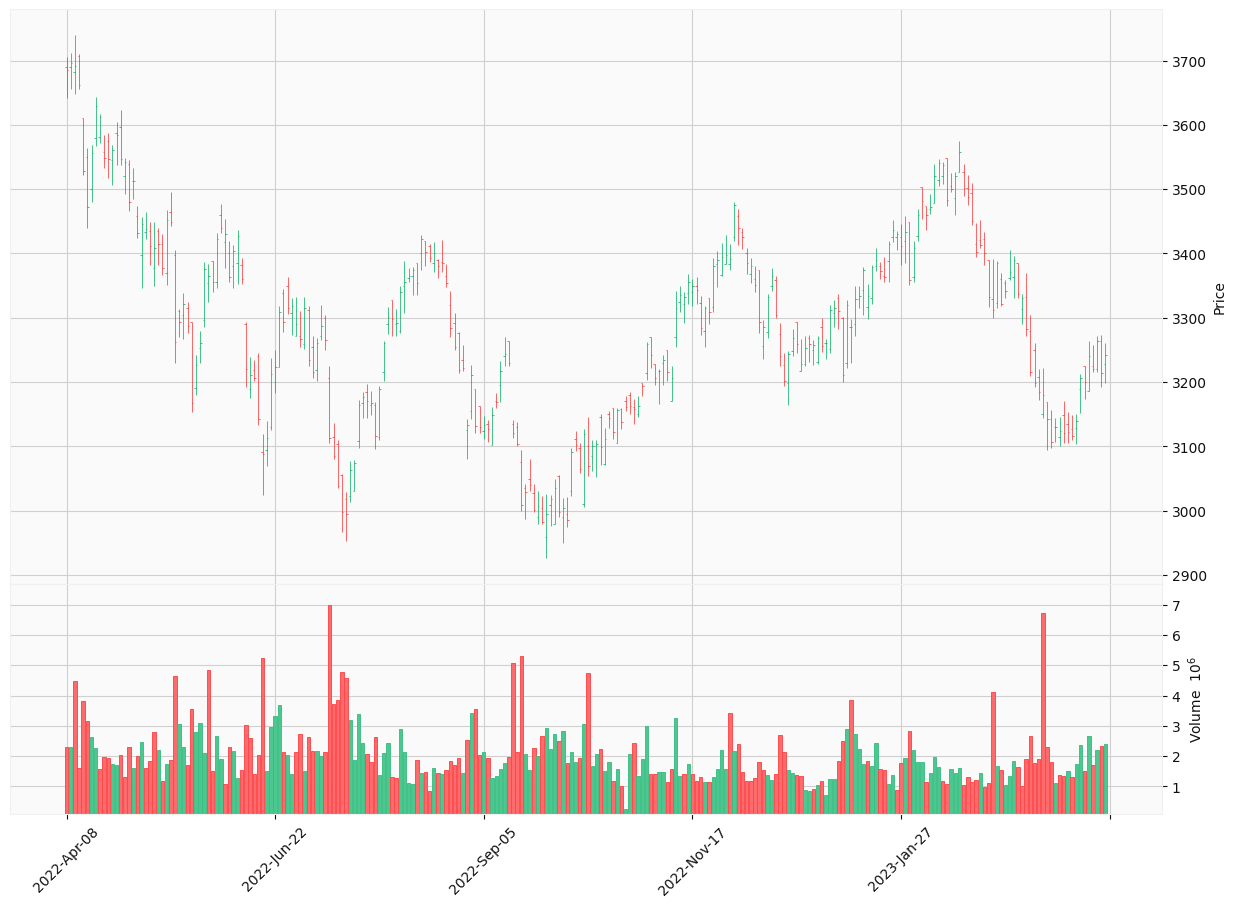

In [ ]:
mpf.plot(tcs.tail(250),type='ohlc',
         style='yahoo',
         volume=True,
        figscale=2)

Line Plot

In [ ]:
fig = px.line(tcs,x = 'Date', y = ['High', 'Low'], template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.line(tcs,x = 'Date', y = ['Open', 'Close'], template = 'plotly_dark')
fig.show()

In [ ]:
fig = px.line(tcs,x = 'Date', y = ['Volume'], template = 'plotly_dark')
fig.show()

3D-Scatter plot

In [ ]:
fig = px.scatter_3d(tcs, x='High', y='Low', z='Close',
              color='Adj Close', template = 'plotly_dark', title = 'Distribution of Highs, Lows and Closing Values represented by Adj Close')
fig.show()

# **ANALYSIS OF STOCK**

### **CAGR Compound Annual Growth Rate (CAGR)**

In [ ]:
tcs2 = pd.read_csv('/content/drive/MyDrive/TCS_Latest_stockdata_yahoo.csv', header=0, 
                  index_col= 0, names=['Date','Open', 'High', 'Low', 'Close','Adj Close', 'Volume'], parse_dates=True)
# Get the number of days in `tcs`
days = (tcs2.index[-1] - tcs2.index[0]).days

# Calculate the CAGR 
cagr = ((((tcs2['Close'][-1]) / tcs2['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of TCS since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of TCS since IPO is  23.81 % per year


In [ ]:
nifty = pd.read_csv('/content/drive/MyDrive/Nifty50.csv', header=0, 
                  index_col= 0, names=['Date','Open', 'High', 'Low', 'Close','Adj Close', 'Volume'], parse_dates=True)
# Get the number of days in `tcs`
days = (nifty.index[-1] - nifty.index[0]).days

# Calculate the CAGR 
cagr = ((((nifty['Close'][-1]) / nifty['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of Nifty 50 Index is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of Nifty 50 Index is  9.23 % per year


Text(0.5, 1.0, 'Total money made by TCS Stock (number of times ): 505.8')

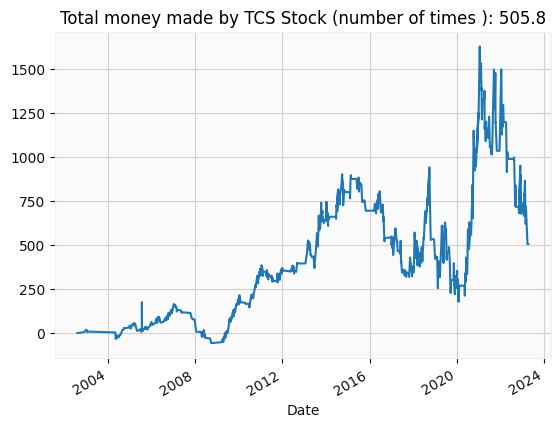

In [ ]:
tcs['SMA20'] = tcs.Close.rolling(20).mean()
tcs['SMA50'] = tcs.Close.rolling(50).mean()
tcs['Shares'] = [1 if tcs.loc[ei, 'SMA20']>tcs.loc[ei, 'SMA50'] else 0 for ei in tcs.index]
tcs['Close1'] = tcs['Close'].shift(-1)
tcs['Profit'] = [tcs.loc[ei, 'Close1'] - tcs.loc[ei, 'Close'] if tcs.loc[ei, 'Shares']==1 else 0 for ei in tcs.index]
tcs['wealth'] = tcs['Profit'].cumsum()
tcs['wealth'].plot()
plt.title('Total money made by TCS Stock (number of times ): {}'.format(round((tcs.loc[tcs.index[-2], 'wealth']),1)))

This indicates that TCS has outperformed the broader market over the long term, and suggests that it may be a good investment option for those seeking higher returns.

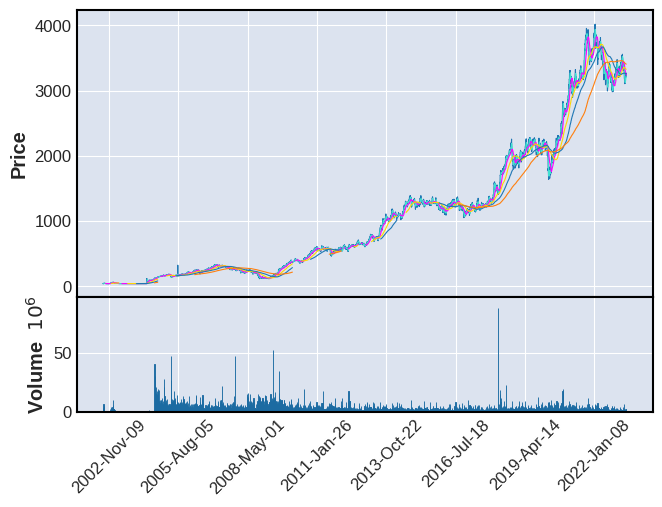

In [ ]:

mpf.plot(tcs, type='line', mav = (7, 30, 90, 180, 365), volume = True , show_nontrading = True)

In [ ]:
nifty = pd.read_csv('/content/drive/MyDrive/Nifty50.csv')
nifty.dropna()
nifty.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
3851,2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700.0
3852,2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400.0
3853,2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000.0
3854,2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400.0
3855,2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300.0


In [ ]:
usdinr = pd.read_csv('/content/drive/MyDrive/USDINR.csv')
usdinr.dropna()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999,0.0
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002,0.0
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999,0.0
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000,0.0
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001,0.0
...,...,...,...,...,...,...,...
5061,2023-04-25,81.852303,82.018799,81.851303,81.852303,81.852303,0.0
5062,2023-04-26,81.991600,82.092003,81.681503,81.991600,81.991600,0.0
5063,2023-04-27,81.766899,81.850998,81.603996,81.766899,81.766899,0.0
5064,2023-04-28,81.765099,81.861099,81.691002,81.765099,81.765099,0.0


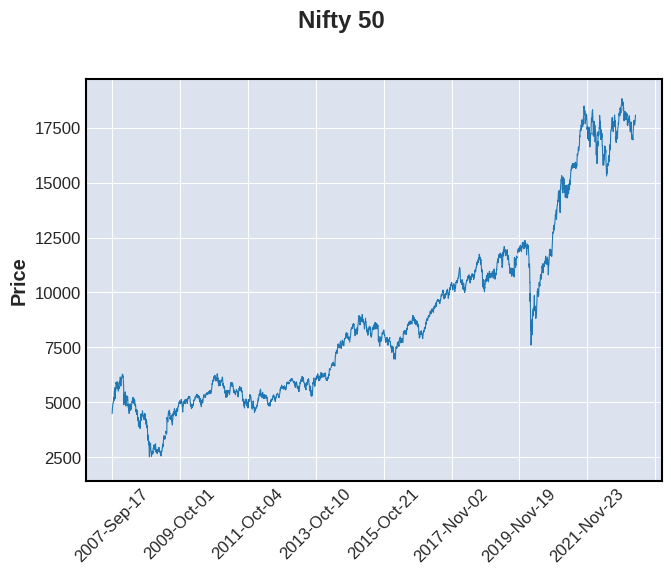

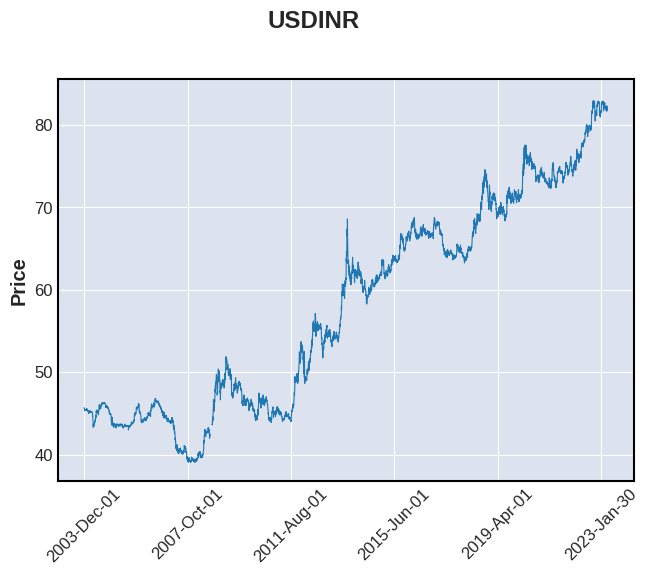

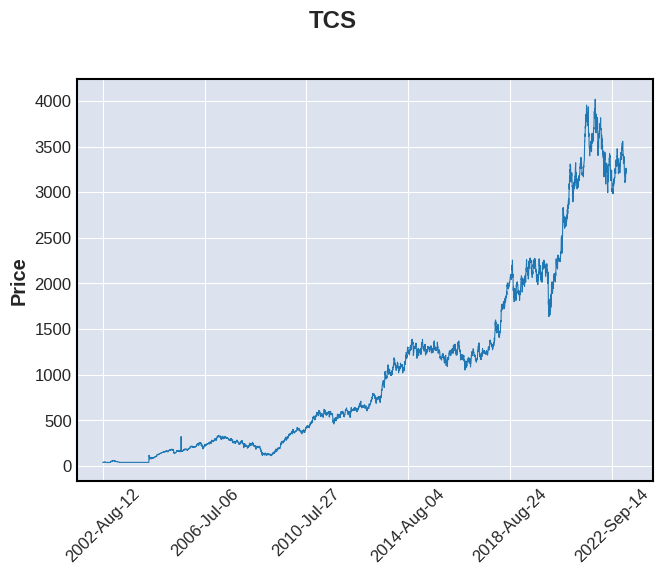

In [ ]:
nifty.index = pd.DatetimeIndex(nifty['Date'])
usdinr.index = pd.DatetimeIndex(usdinr['Date'])
mpf.plot(nifty, type='line', title = "Nifty 50")
mpf.plot(usdinr, type='line', title = "USDINR")
mpf.plot(tcs, type='line',title = "TCS")

### ***Using ML models to Forecast the prices***

Read the Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCS_Latest_stockdata_yahoo.csv')
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.484993,212976.0
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,28.099329,153576.0
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,26.162064,822776.0
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,26.162064,0.0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,26.099281,811856.0
...,...,...,...,...,...,...,...
5138,2023-04-05,3185.500000,3264.350098,3185.500000,3239.800049,3239.800049,2655065.0
5139,2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3220.699951,1703464.0
5140,2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3263.399902,2203187.0
5141,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779.0


Convert the Date column to a numeric format

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype(int) / 10**9

split into features and target

In [ ]:
X = df.drop(['Date', 'Close'], axis=1)  # features
y = df['Close']  # target

split into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

drop rows with missing values

In [ ]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]

Create and train the DecisionTree Model

In [ ]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

Create and train the RandomForestRegressor Model

In [ ]:
model_rfm = RandomForestRegressor(n_estimators=100, random_state=42)
model_rfm.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Create and train the SVM Model

In [ ]:
model_svm = SVR(kernel='rbf', C=1e3, gamma=0.1)
model_svm.fit(X_train, y_train)

SVR(C=1000.0, gamma=0.1)

 Make predictions on the test data

In [ ]:
y_pred_d = dtree.predict(X_test)
y_pred_rfm = model_rfm.predict(X_test)
y_pred_svm = model_svm.predict(X_test)

evaluate the model using mean squared error and R-squared score

In [ ]:
mae_d = mean_absolute_error(y_test, y_pred_d)
mse_d = mean_squared_error(y_test, y_pred_d)
r2_d = r2_score(y_test, y_pred_d)

mae_rfm = mean_absolute_error(y_test, y_pred_rfm)
mse_rfm = mean_squared_error(y_test, y_pred_rfm)
r2_rfm = r2_score(y_test, y_pred_rfm)

mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

Print the mean squared error and R2 score of the model

In [ ]:
print("Mean Absolute Error of DecisionrTree: ", mae_d )
print("Mean Absolute Error of RandomForestRegressor: ", mae_rfm )
print("Mean Absolute Error of SVM: ", mae_svm )

print("\nMean Squared Error of DecisionrTree:", mse_d)
print('Mean squared error of RandomForestRegressor:', mse_rfm)
print("Mean Squared Error of SVM:", mse_svm)

print("\nR2 Score of DecisionTree:", r2_d)
print('R2 score of RandomForestRegressor:', r2_rfm)
print("R2 squared Score of SVM:", r2_svm)

Mean Absolute Error of DecisionrTree:  5.612414772151904
Mean Absolute Error of RandomForestRegressor:  4.3703048648490865
Mean Absolute Error of SVM:  784.9725783898521

Mean Squared Error of DecisionrTree: 119.40769657149006
Mean squared error of RandomForestRegressor: 68.38212441843415
Mean Squared Error of SVM: 1065706.0194715962

R2 Score of DecisionTree: 0.9998920838090664
R2 score of RandomForestRegressor: 0.9999381988045405
R-squared Score of SVM: 0.03685492997050832


### **TCS Stock Price Prediction**

Importing the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCS_Latest_stockdata_yahoo.csv')

filter the 'Date' and 'Close' columns

In [ ]:
df = df[['Date', 'Close']]

convert the 'Date' column to datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

Prepare the data

In [ ]:
df = df[['Date', 'Close']]
df = df.dropna()
X = np.array(df.index).reshape(-1, 1)
y = np.array(df['Close'])

Train the model

Decision Tree Regressor

In [ ]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X, y)

DecisionTreeRegressor()

Random Forest Regressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X, y)

RandomForestRegressor()

Support Vector Regressor

In [ ]:
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X, y)

SVR()

Forecast the prices for the next month

In [ ]:
X_forecast = np.array(np.arange(len(df)+1, len(df)+32)).reshape(-1, 1)
y_dt = dt_reg.predict(X_forecast)
y_rf = rf_reg.predict(X_forecast)
y_svr = svr_reg.predict(X_forecast)

Plot the predictions on a chart

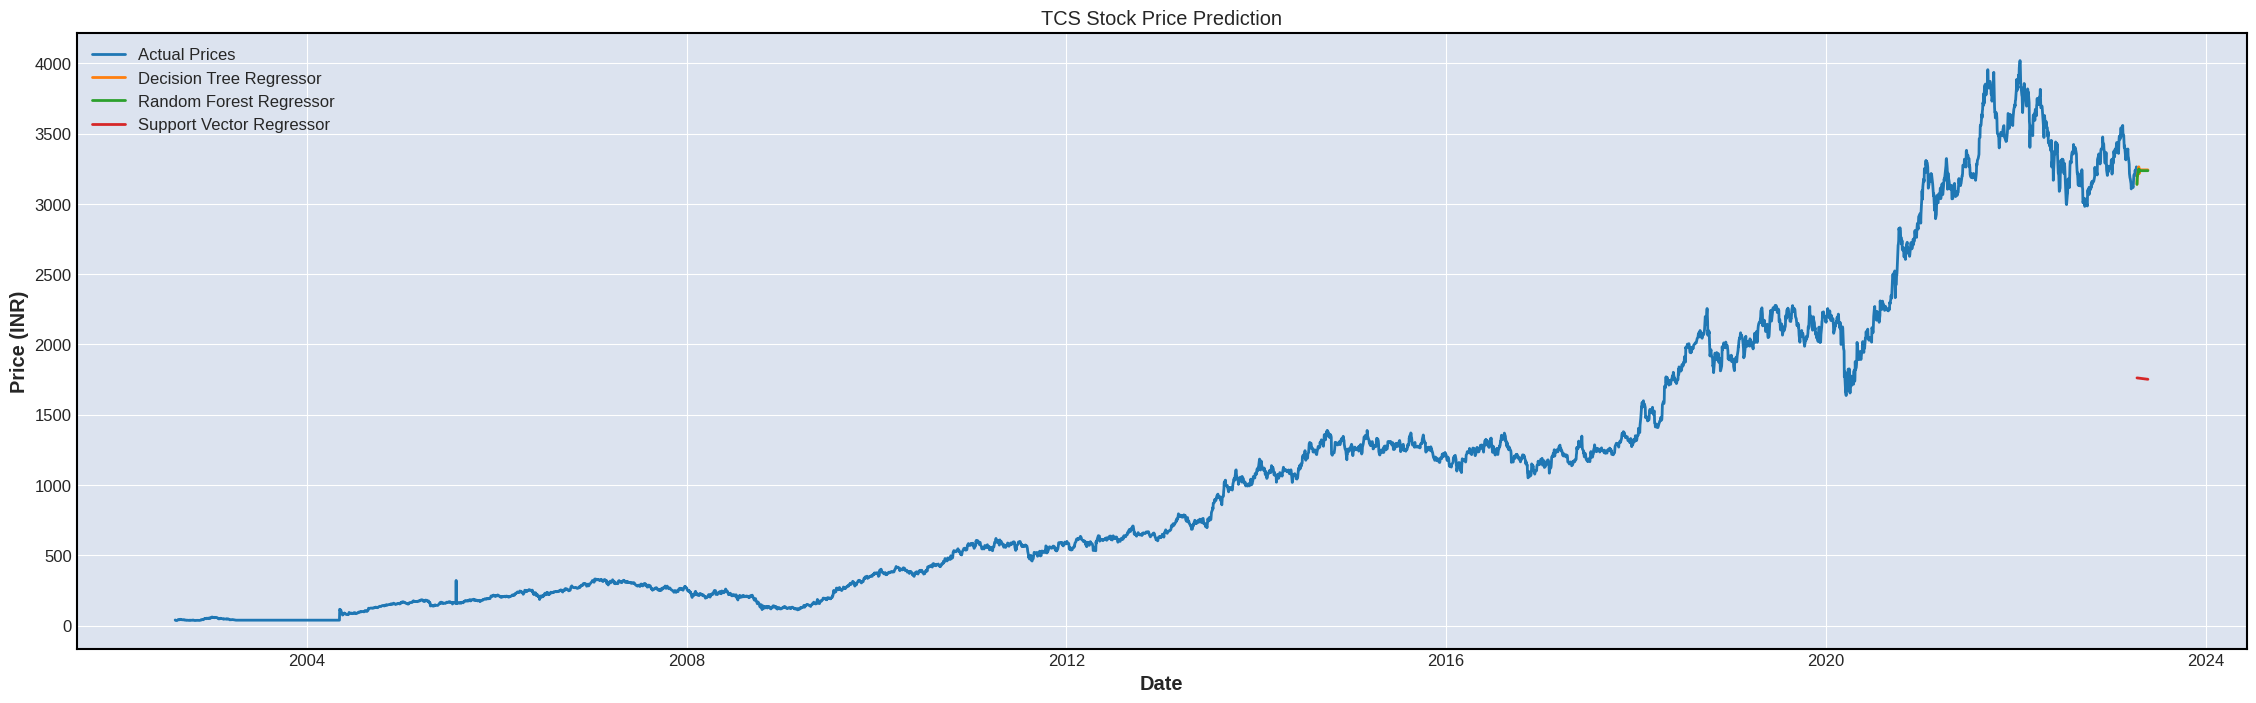

In [ ]:
plt.figure(figsize=(28,8))
plt.plot(df['Date'], df['Close'], label='Actual Prices')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='B'), y_dt, label='Decision Tree Regressor')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='B'), y_rf, label='Random Forest Regressor')
plt.plot(pd.date_range(start=df['Date'].iloc[-1], periods=31, freq='B'), y_svr, label='Support Vector Regressor')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()

In conclusion, this project concentrated on the analytical analysis of the TCS stock and the prediction of that stock using machine learning methods. The study examined both macroeconomic and company-specific factors that could influence the price of the TCS stock. The stock prices of TCS were predicted using three machine learning models: DecisionTree, RandomForestRegressor, and SVM. The findings showed that RandomForestRegressor had the lowest mean absolute error and mean squared error as well as the highest R-squared score.
Additionally, the study discovered that TCS has outperformed the Nifty 50 Index since its IPO, with a higher CAGR. The results of this analysis can help investors and financial analysts make judgements about buying or selling TCS stock.

The study does, however, have certain drawbacks, including the scarcity of data, the use of only three machine learning models, and assumptions made during the analysis. By utilising more sophisticated machine learning models and incorporating additional data sources, future research can overcome these restrictions.
Overall, this study emphasises how critical it is to comprehend the variables influencing stock prices and to employ machine learning approaches for precise stock price prediction.


In [ ]:
#! sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
#!jupyter nbconvert --to pdf /content/drive/MyDrive/FinalProjectBA1.ipynb